<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Sale <br>
**Notebook 2: EDA & Baseline Model<br>**

# TABLE OF CONTENTS

**1. Data Cleaning** <br>
**2. EDA & Baseline Model (This Notebook)** <br>
- [01. Library and Cleaned Data Import](#01.-LIBRARY-AND-CLEANED-DATA-IMPORT) <br>
- [02. Exploratory Data Analysis](#02.-EXPLORATORY-DATA-ANALYSIS) <br>
- [03. Baseline Model](#03.-BASELINE-MODEL) <br>
- [04. Summary & Findings](#04.-SUMMARY-&-FINDINGS) <br>
- [05. Export Data](#05.-EXPORT-DATA) <br>

**3. Model Tuning & Kaggle Submission** <br>

# 01. LIBRARY AND CLEANED DATA IMPORT

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import sklearn libraries

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, Ridge, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [3]:
# import cleaned Train datasets
df = pd.read_csv('../datasets/train_cleaned_1.csv')
pd.set_option('display.max_columns', None)

# 02. EXPLORATORY DATA ANALYSIS

In [4]:
top_features_corr = df.corr()['SalePrice'].sort_values(ascending = False).head(6)
top_features_corr = top_features_corr.to_frame(name = 'Correlation')
top_features_corr = top_features_corr.drop(index = 'SalePrice')

In [5]:
top_features_corr

,Correlation
Overall Qual,0.800079
Exter Qual,0.711972
Gr Liv Area,0.697395
Kitchen Qual,0.692447
Garage Area,0.650390


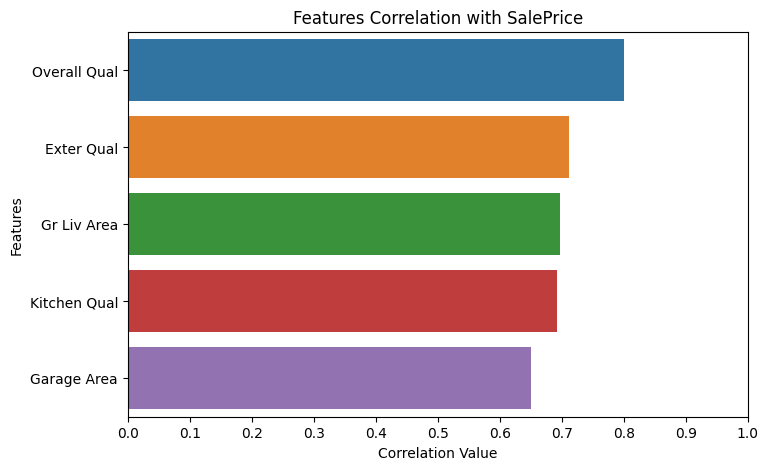

In [6]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data = top_features_corr , y = top_features_corr.index, x = 'Correlation')
ax.set_ylabel('Features')
ax.set_xlabel('Correlation Value')
ax.set_title('Features Correlation with SalePrice')
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]);
plt.show()

The top 5 features affecting SalePrice are: Overall Qual, Exter Qual, Gr Liv Area, Kitchen Qual, and Garage Area. <br>
We shall pay more attention to these 5 features during EDA.

## A. Nominal Feature vs SalePrice

In [7]:
nominal_df = df[['MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1',
                 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
                 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type']].copy()

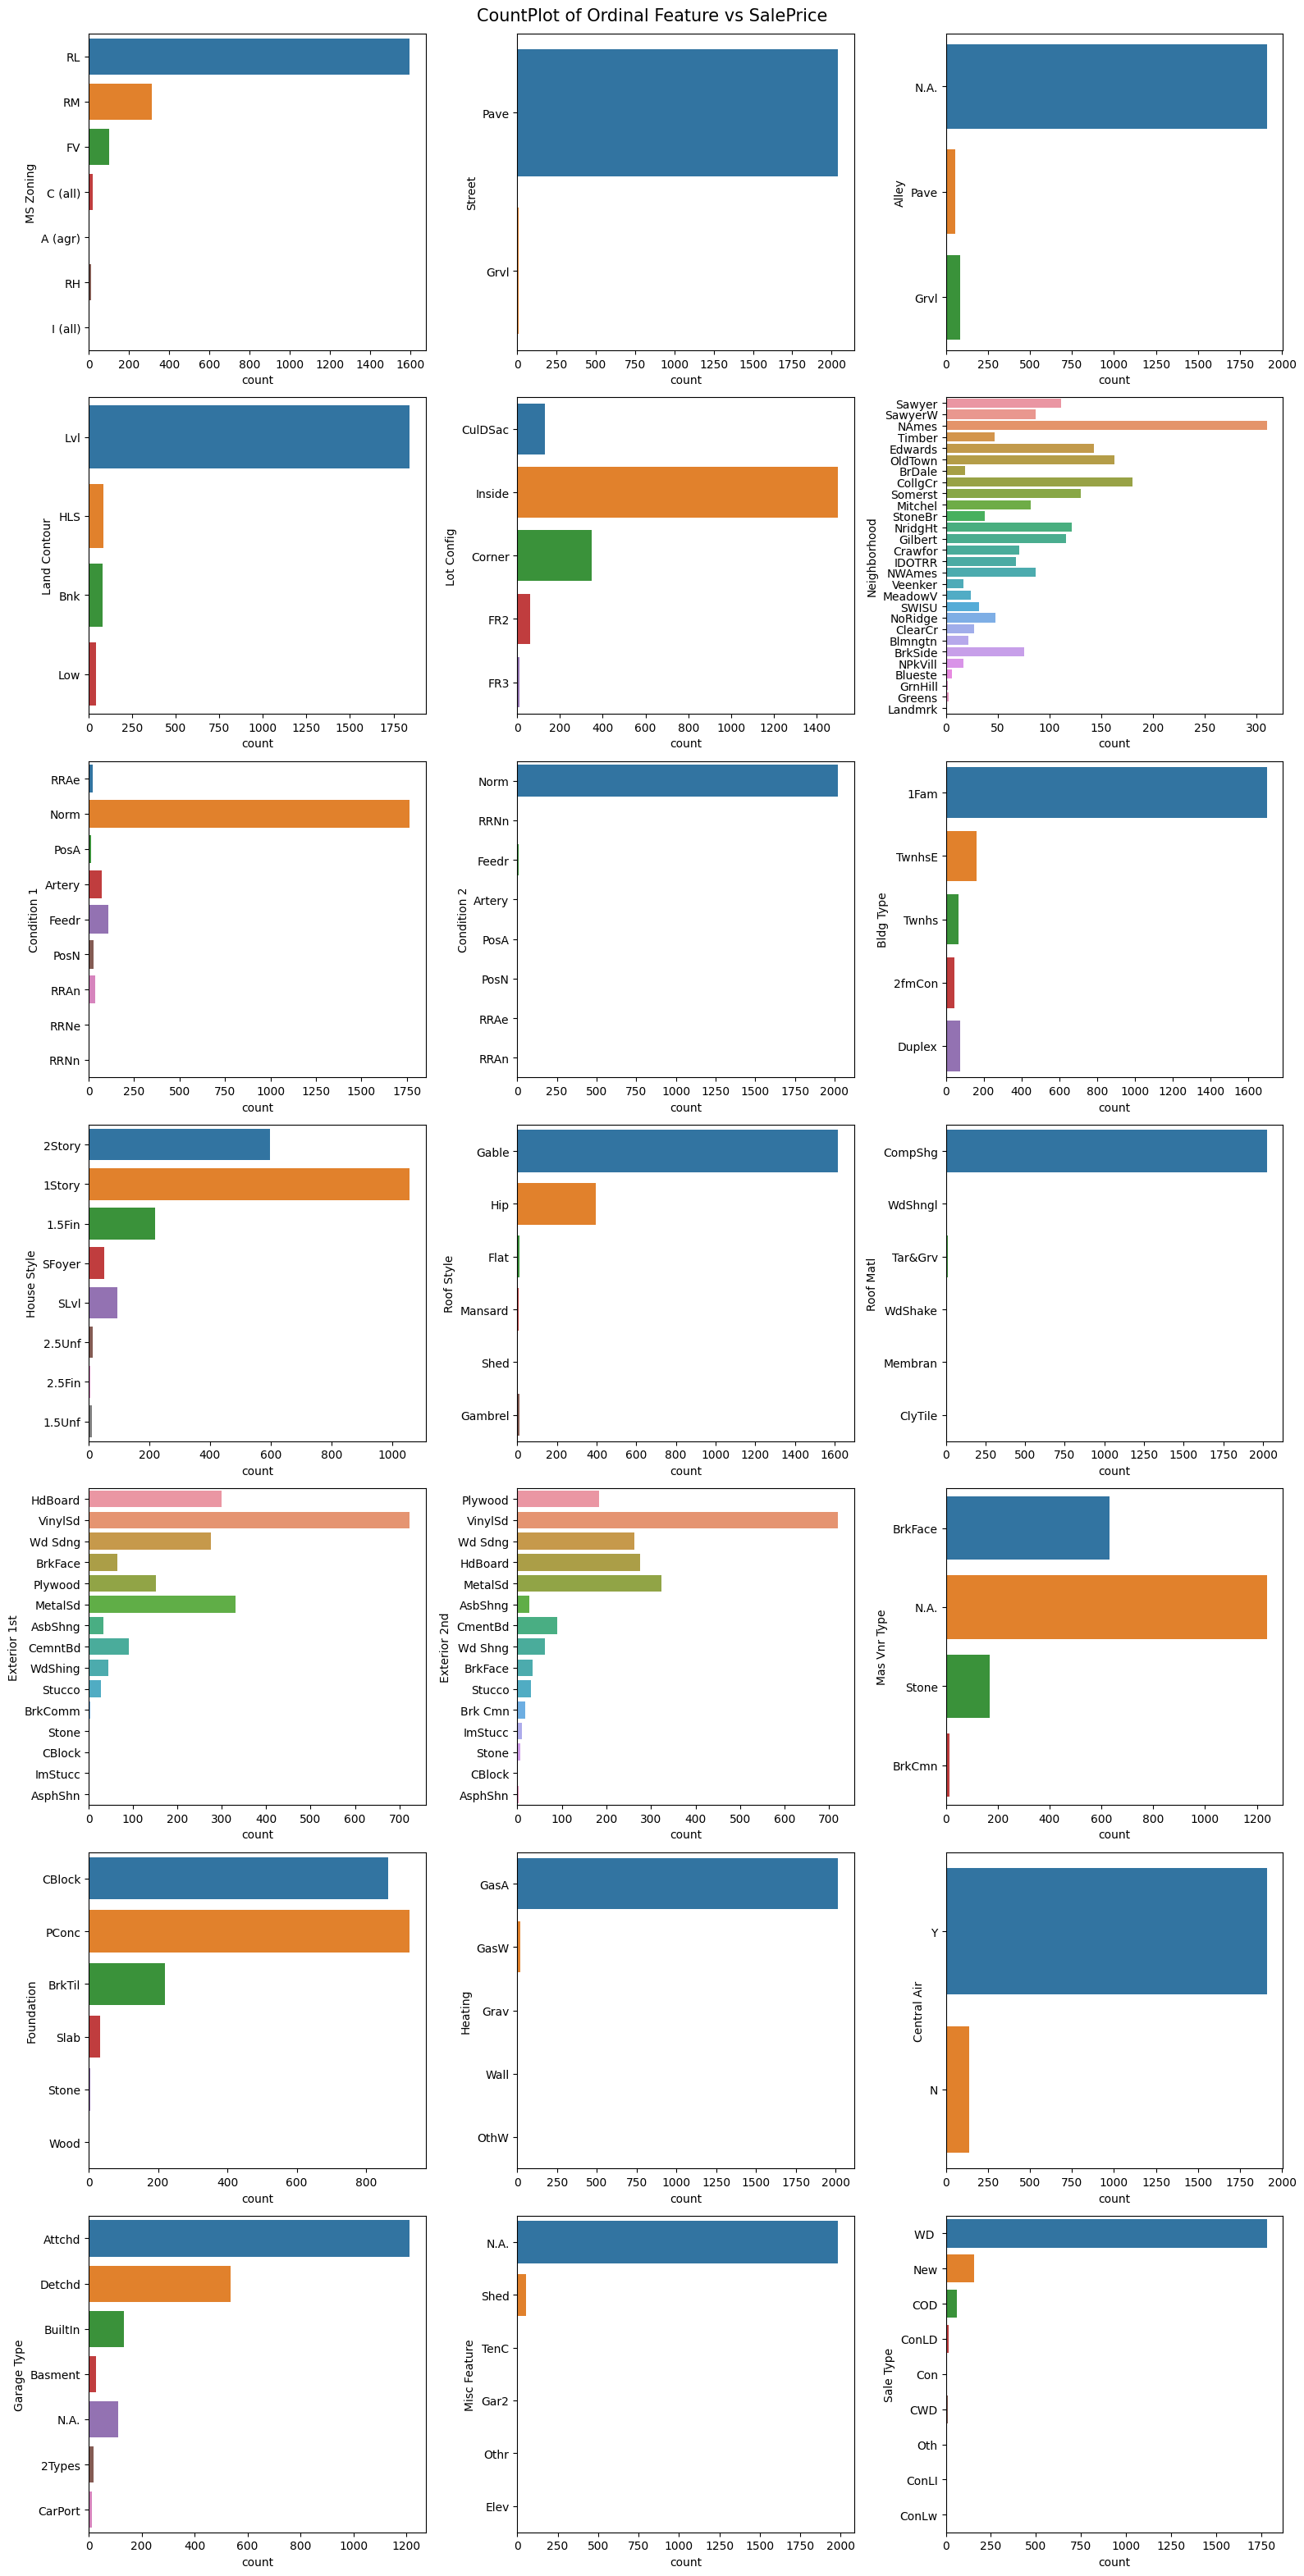

In [8]:
fig, ax = plt.subplots(nrows = 7, ncols = 3, figsize=(16,32))

x = 0
y = 0

for feature in nominal_df:
    sns.countplot(y = df[feature], ax = ax[x][y])
    
    if y != 2:
        y += 1
    else:
        y = 0
        x += 1
    
plt.suptitle('CountPlot of Ordinal Feature vs SalePrice', fontsize = 15)
plt.tight_layout()
fig.subplots_adjust(top=0.97);

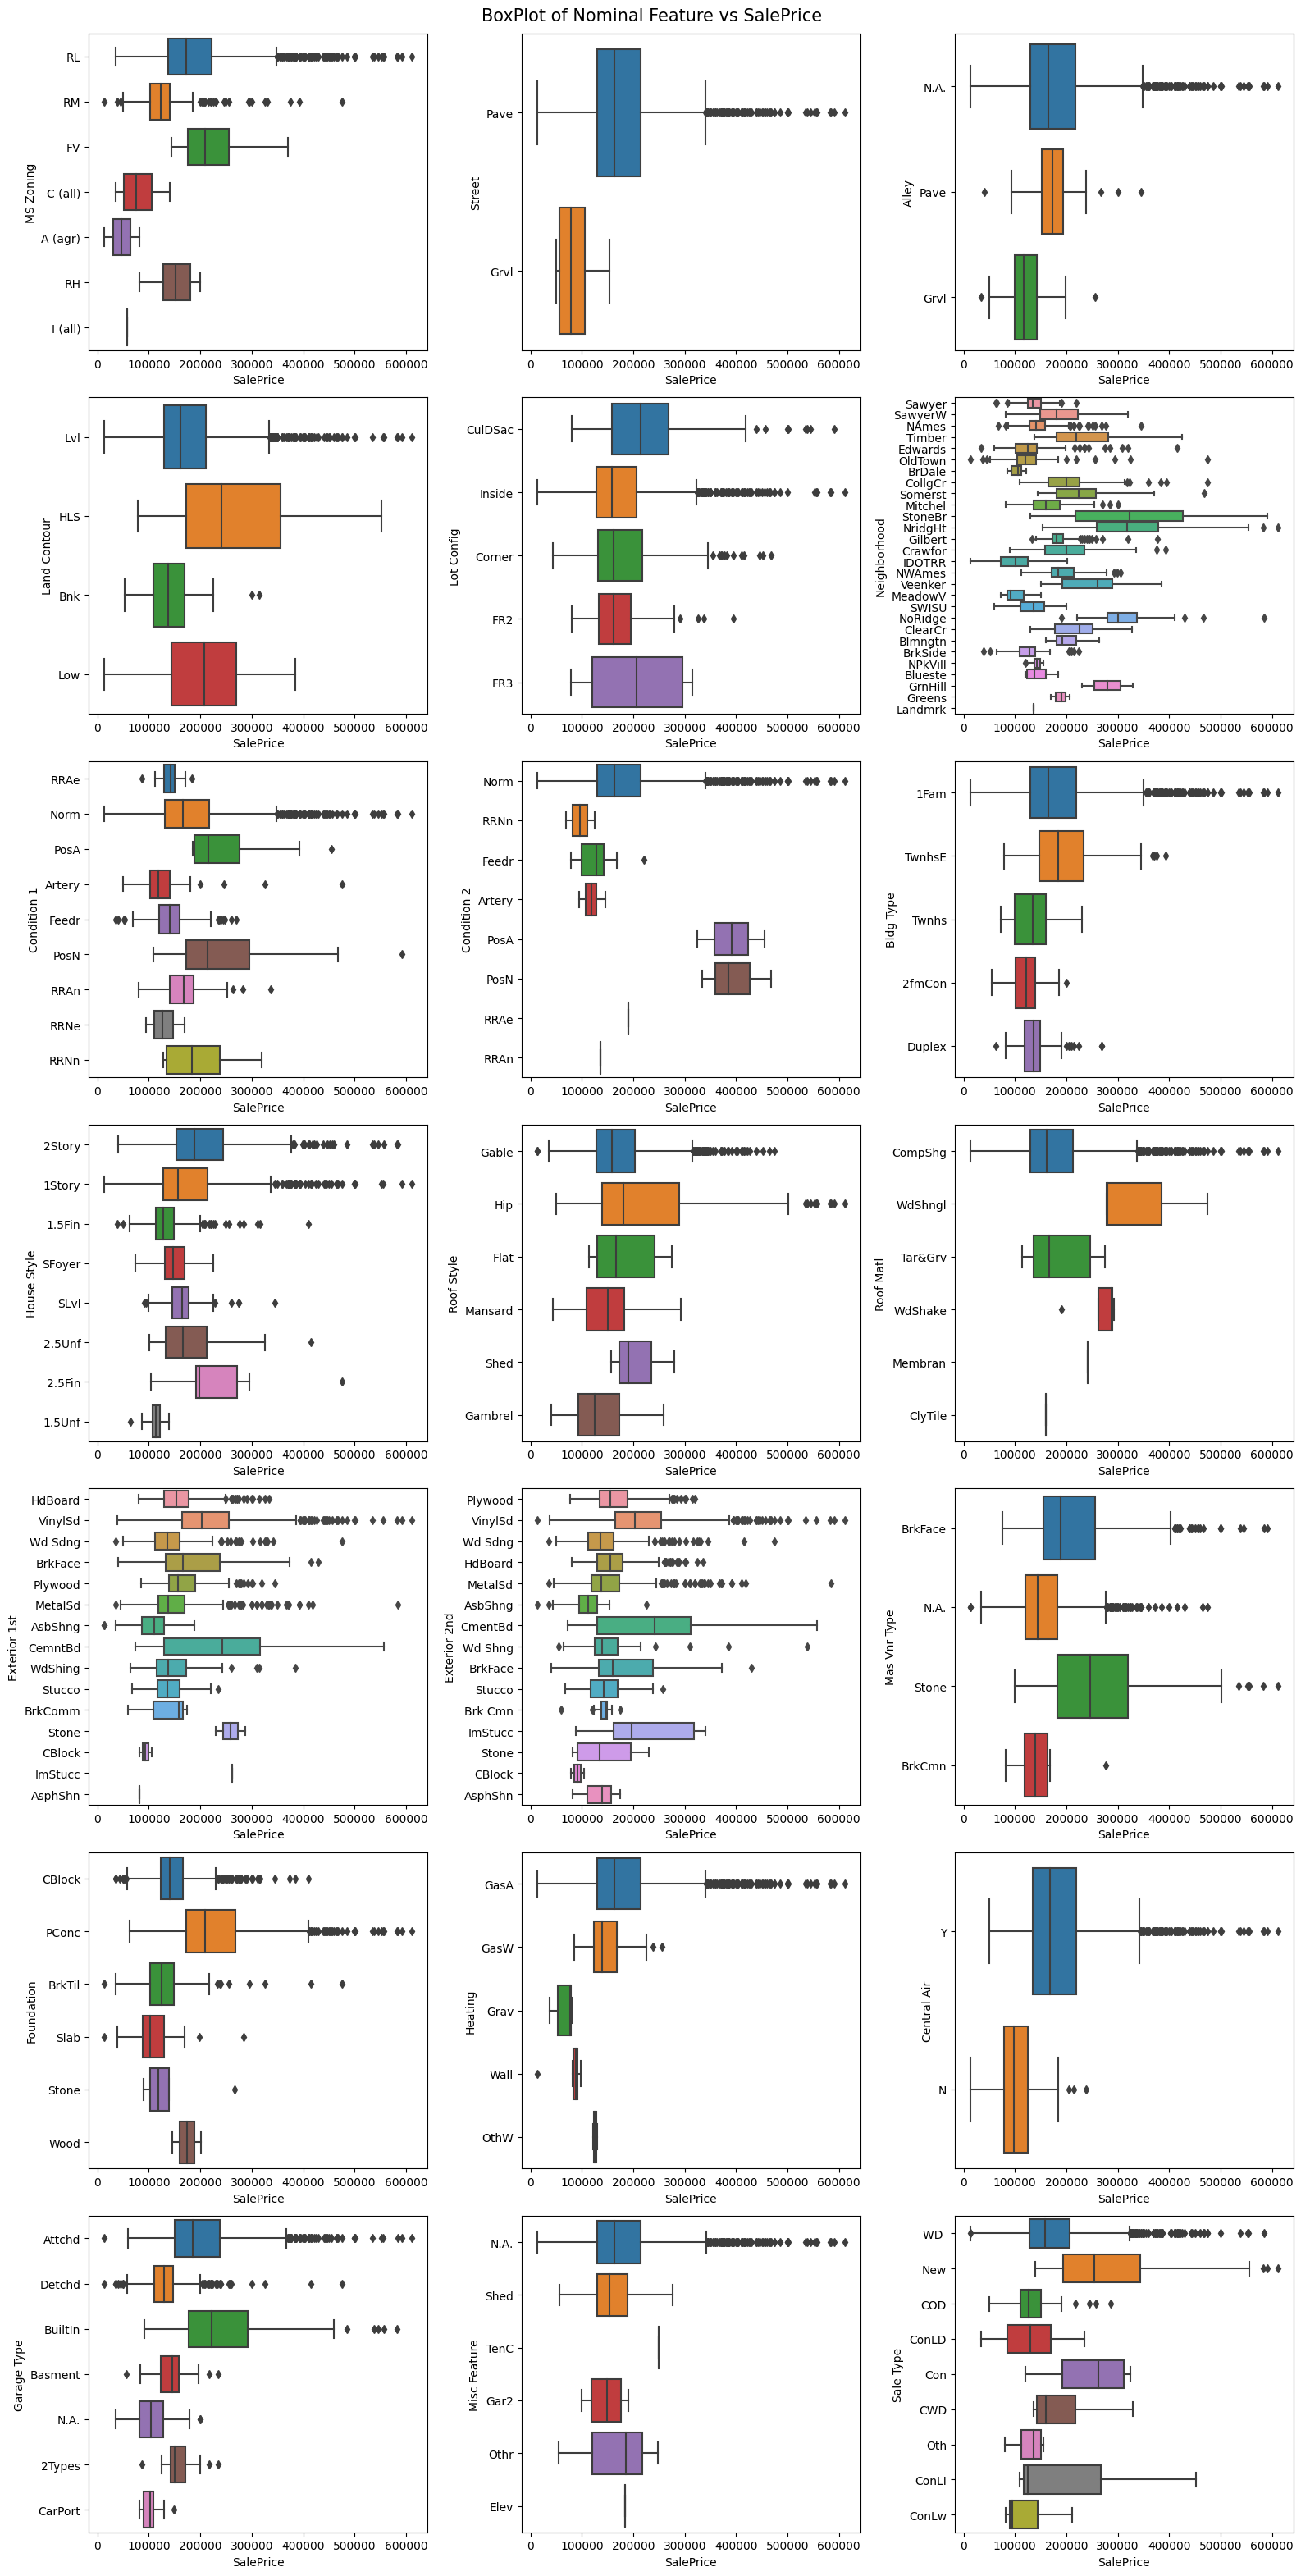

In [9]:
fig, ax = plt.subplots(nrows = 7, ncols = 3, figsize=(16,32))

x = 0
y = 0

for feature in nominal_df:
    sns.boxplot(y = df[feature], x = df["SalePrice"], ax = ax[x][y])
    
    if y != 2:
        y += 1
    else:
        y = 0
        x += 1
    
plt.suptitle('BoxPlot of Nominal Feature vs SalePrice', fontsize = 15)
plt.tight_layout()
fig.subplots_adjust(top=0.97);

**Observations:** <br>
1. In general, the features does not have a good category distributions.
1. Neighborhood has high correlation with SalePrice.
2. Several category seems to affect SalePrice. For example 'Street', even though houses with 'Street' type 'Grvl' tend to have a mean SalePrice of ~80k, and houses with Street type 'Pave' has mean price of ~150k, we can observe that there's a lot of outliers in Street type 'Pave', which suggests that maybe there are other features that drive the SalePrice higher.

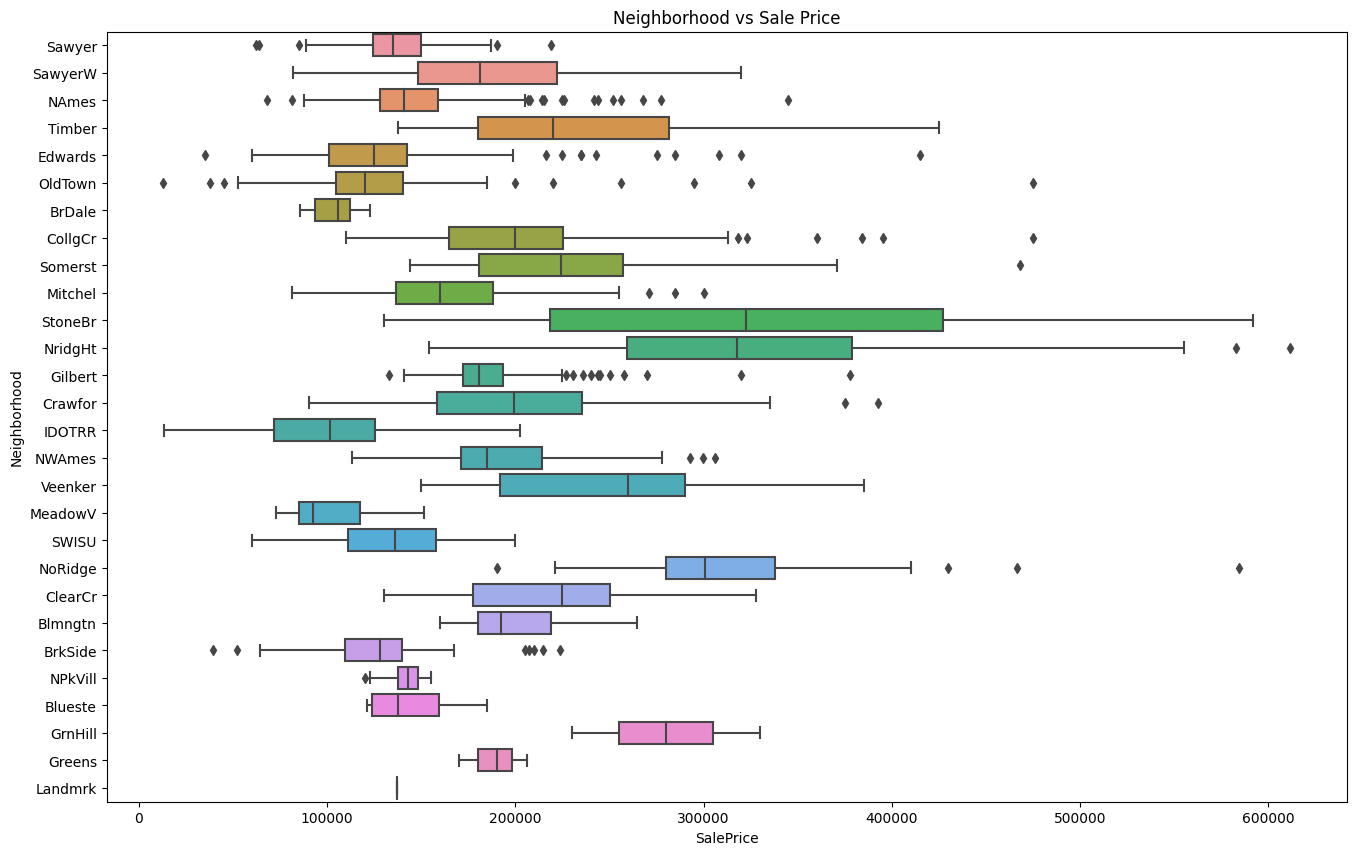

In [10]:
plt.figure(figsize=(16, 10))
sns.boxplot(y = df['Neighborhood'], x=df['SalePrice'])
plt.title('Neighborhood vs Sale Price');

**Observations:** Neighborhood 'StoneBr', 'NridgHt', and 'NoRidge' are the three neighborhoods that have higher SalePrice

## B. Numeric Feature vs SalePrice

In [11]:
numeric_df = df[['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
                 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
                 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
                 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
                 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']].copy()

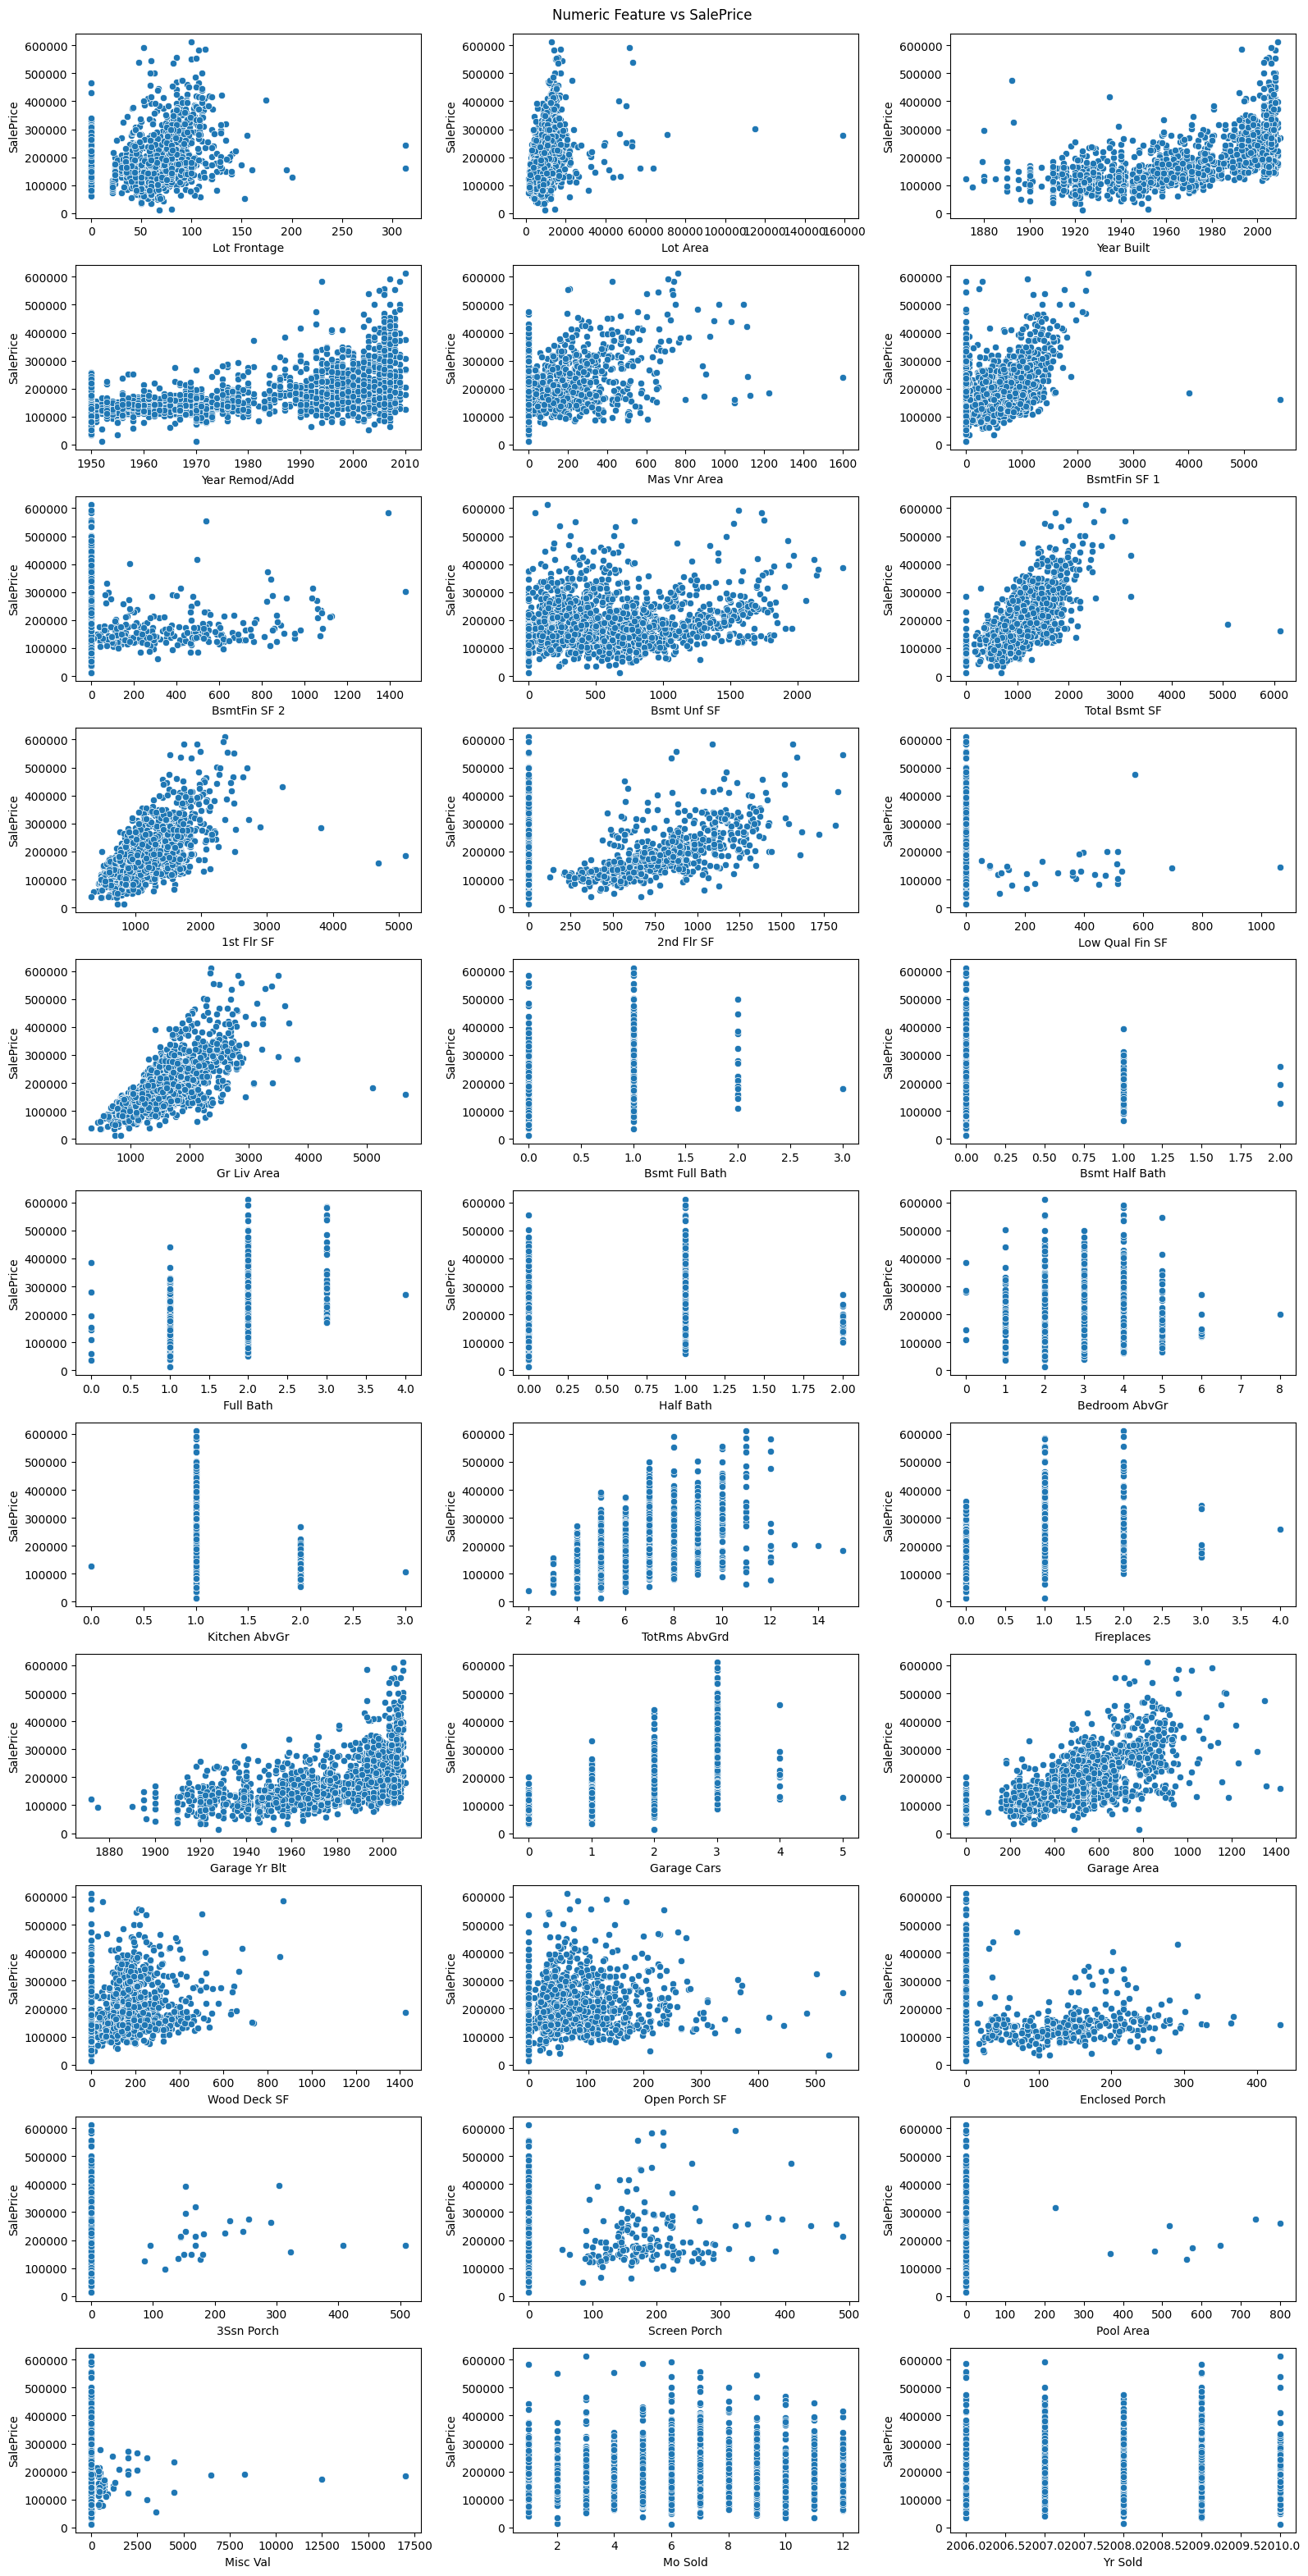

In [12]:
fig, ax = plt.subplots(nrows = 11, ncols = 3, figsize=(16,32))

x = 0
y = 0

for feature in numeric_df:
    sns.scatterplot(data = df, x = feature, y = "SalePrice", ax = ax[x][y])
    
    if y != 2:
        y += 1
    else:
        y = 0
        x += 1

plt.suptitle('Numeric Feature vs SalePrice')
plt.tight_layout()
fig.subplots_adjust(top=0.97);

**Observations:**
1. Most of the scatterplot foes not show strong correlation with SalePrice, such as: 'Mo Sold', 'Yr Sold'
2. Most of the houses has 0 'Low Qual Fin SF', '3Ssn Porch', 'Pool Area'
3. There are outliers seen in 'Total Bsmt SF', 'Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'Gr Liv Area' etc

[Text(0.5, 1.0, 'Total Bsmt SF vs Sale Price')]

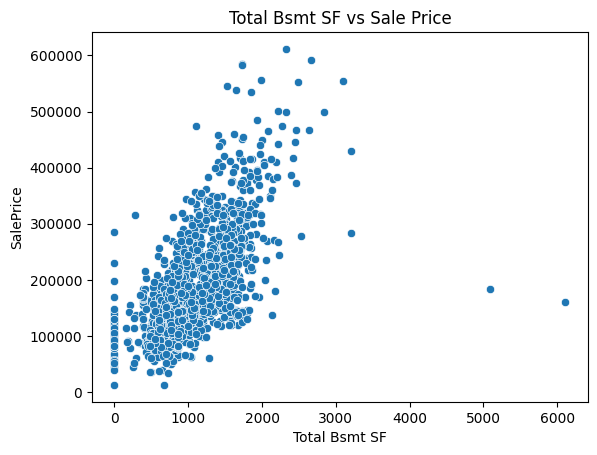

In [13]:
sns.scatterplot(data = df, x = 'Total Bsmt SF', y = 'SalePrice').set(title='Total Bsmt SF vs Sale Price')

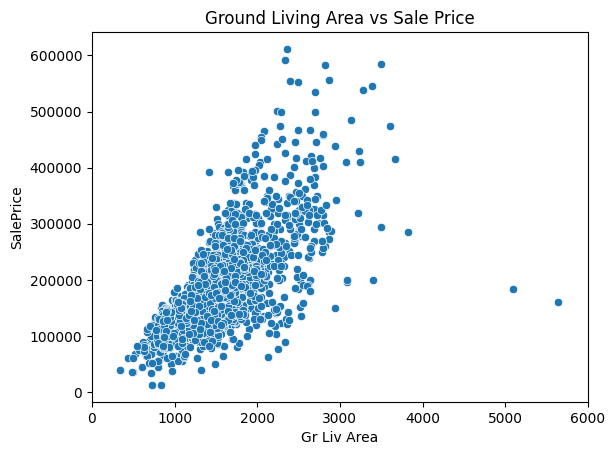

In [14]:
sns.scatterplot(data = df, x = 'Gr Liv Area', y = 'SalePrice').set(title='Ground Living Area vs Sale Price')
plt.xticks([0, 1000, 2000, 3000, 4000, 5000, 6000]);

**Observations:**
- There's no outliers spotted in 'Garage Area' vs 'SalePrice'
- There are 2 outliers (very large houses priced under 200k). We shall remove them to increase model accuracy.

In [15]:
df[(df['Gr Liv Area'] > 5000)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,60,RL,313.0,63887,Pave,N.A.,1,Bnk,4,Corner,3,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,5,3,PConc,5,3,4,6,5644.0,1,0.0,466.0,6110.0,GasA,5,Y,5,4692,950,0,5642,2.0,0.0,2,1,3,1,5,12,8,3,4,Attchd,2008.0,3,2.0,1418.0,3,3,3,214,292,0,0,0,480,3,0,N.A.,0,1,2008,New,160000
1883,20,RL,128.0,39290,Pave,N.A.,3,Bnk,4,Inside,3,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,5,3,PConc,5,3,4,6,4010.0,1,0.0,1085.0,5095.0,GasA,5,Y,5,5095,0,0,5095,1.0,1.0,2,1,2,1,5,15,8,2,4,Attchd,2008.0,3,3.0,1154.0,3,3,3,546,484,0,0,0,0,0,0,Elev,17000,10,2007,New,183850


In [16]:
df.drop(df.loc[df['Gr Liv Area'] > 5000, 'Gr Liv Area'].index, inplace = True)

## C. Ordinal Feature vs SalePrice

In [17]:
ordinal_df = df[['Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond',
                 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC',
                 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond',
                 'Paved Drive', 'Pool QC', 'Fence']].copy()

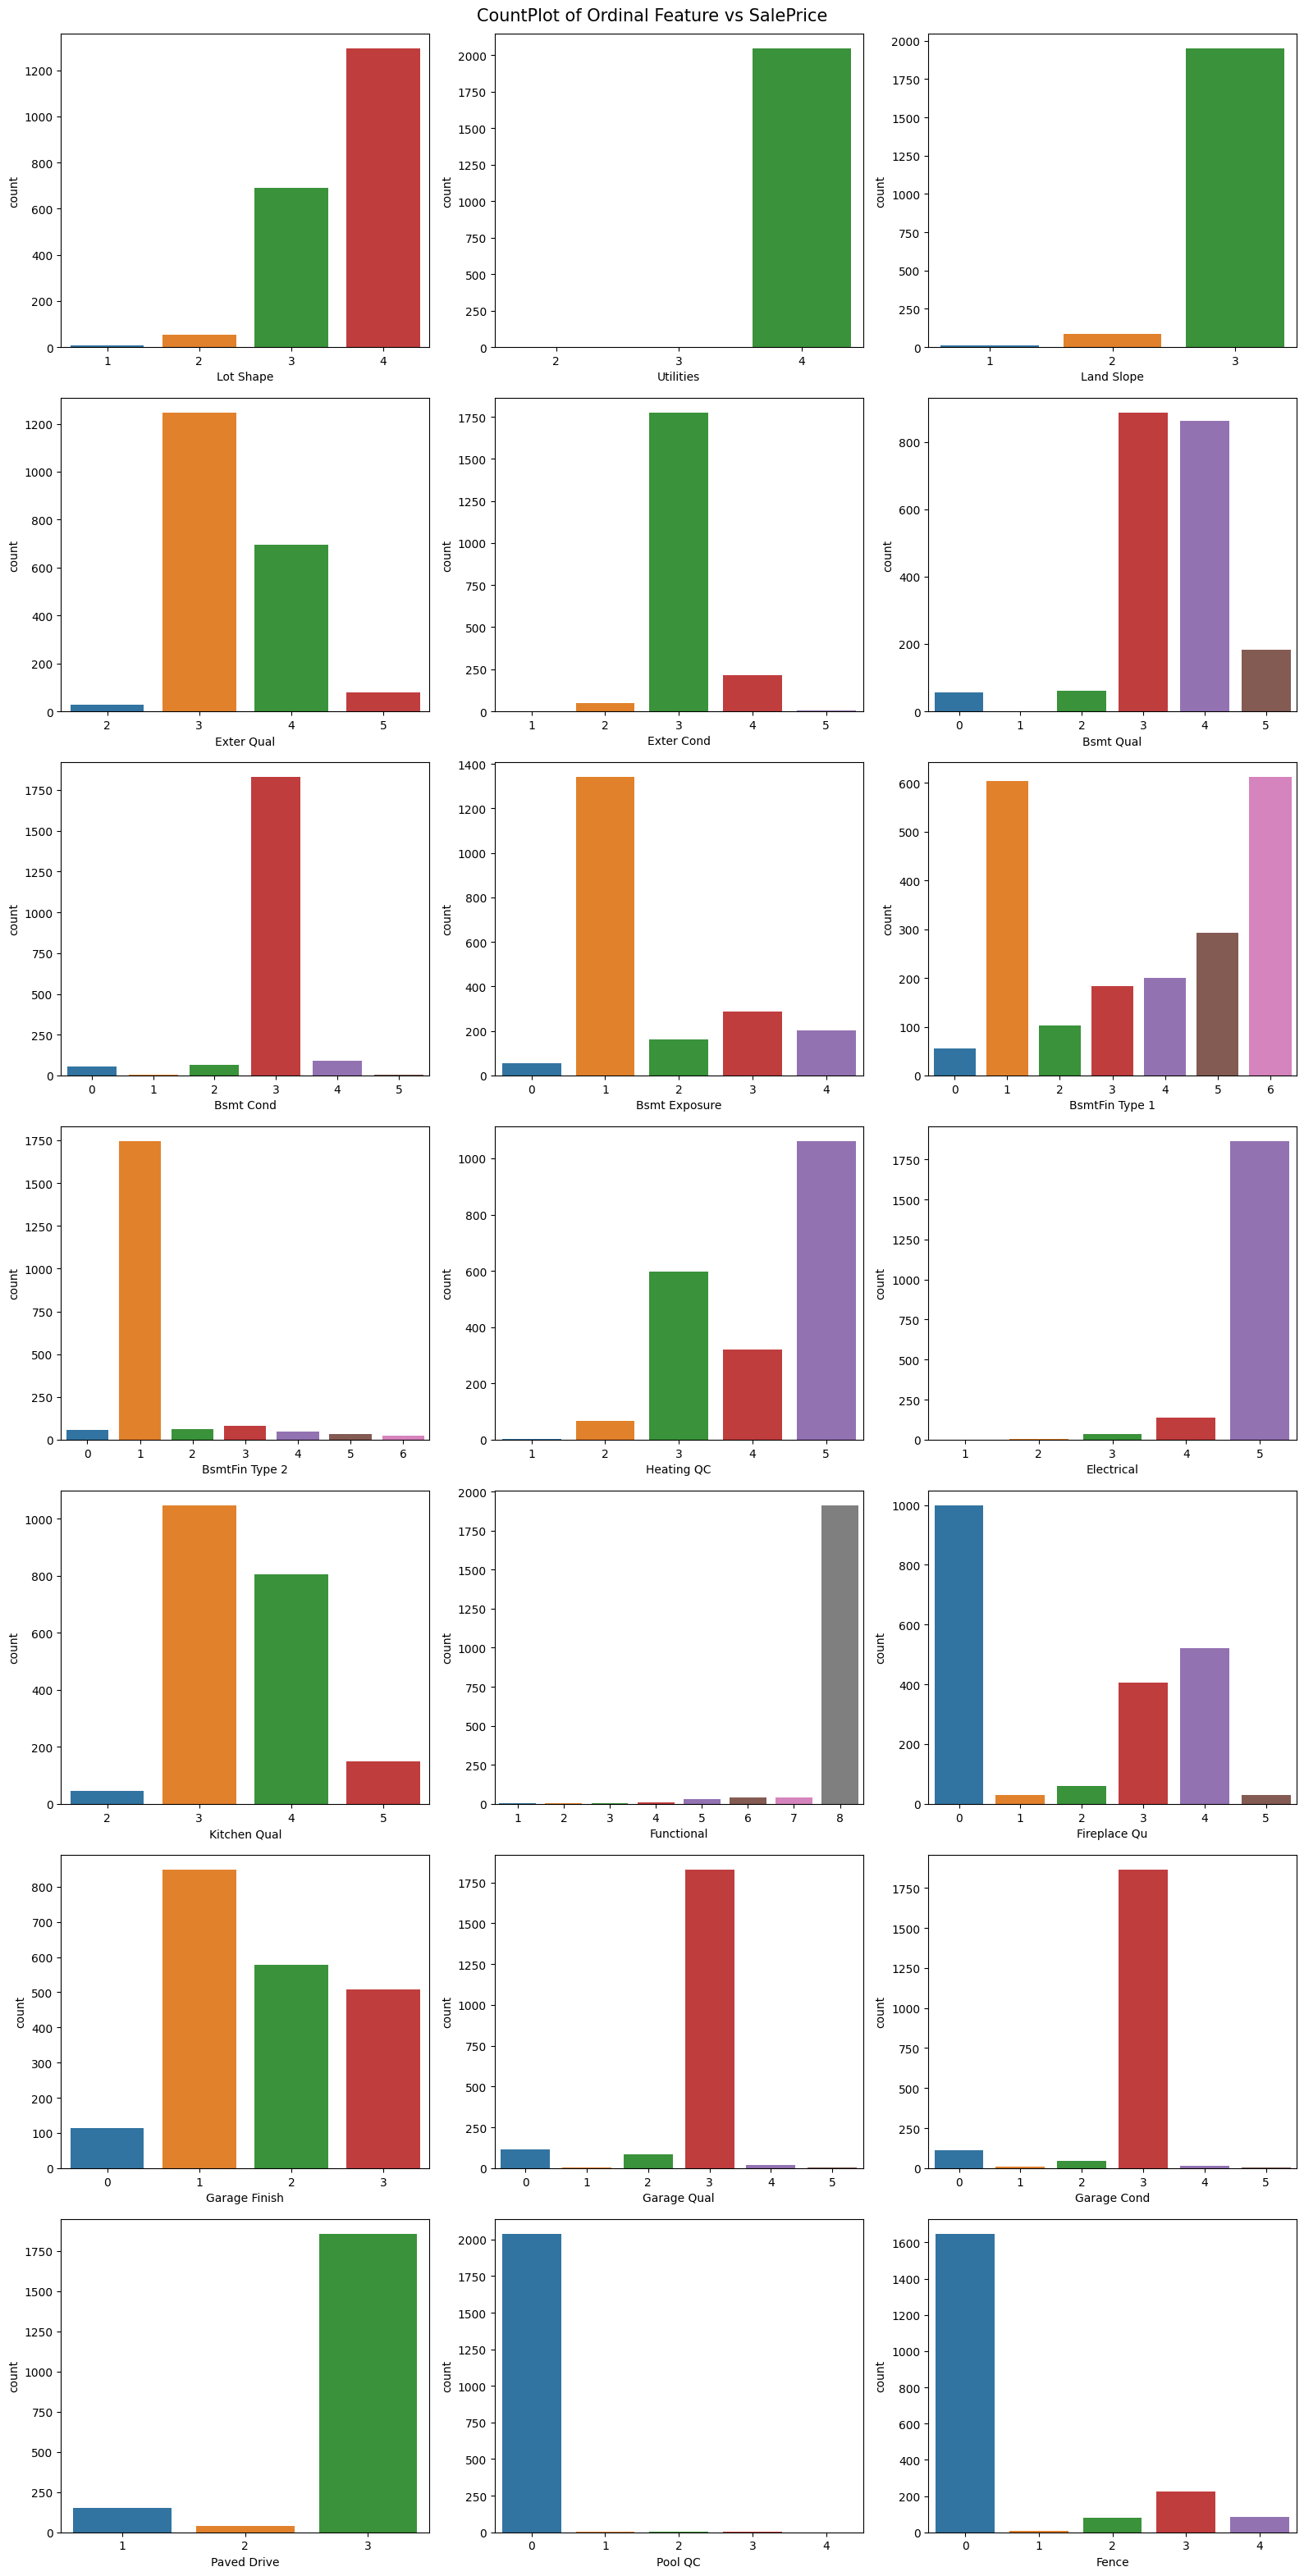

In [18]:
fig, ax = plt.subplots(nrows = 7, ncols = 3, figsize=(16,32))

x = 0
y = 0

for feature in ordinal_df:
    sns.countplot(x = df[feature], ax = ax[x][y])
    
    if y != 2:
        y += 1
    else:
        y = 0
        x += 1
    
plt.suptitle('CountPlot of Ordinal Feature vs SalePrice', fontsize = 15)
plt.tight_layout()
fig.subplots_adjust(top=0.97);

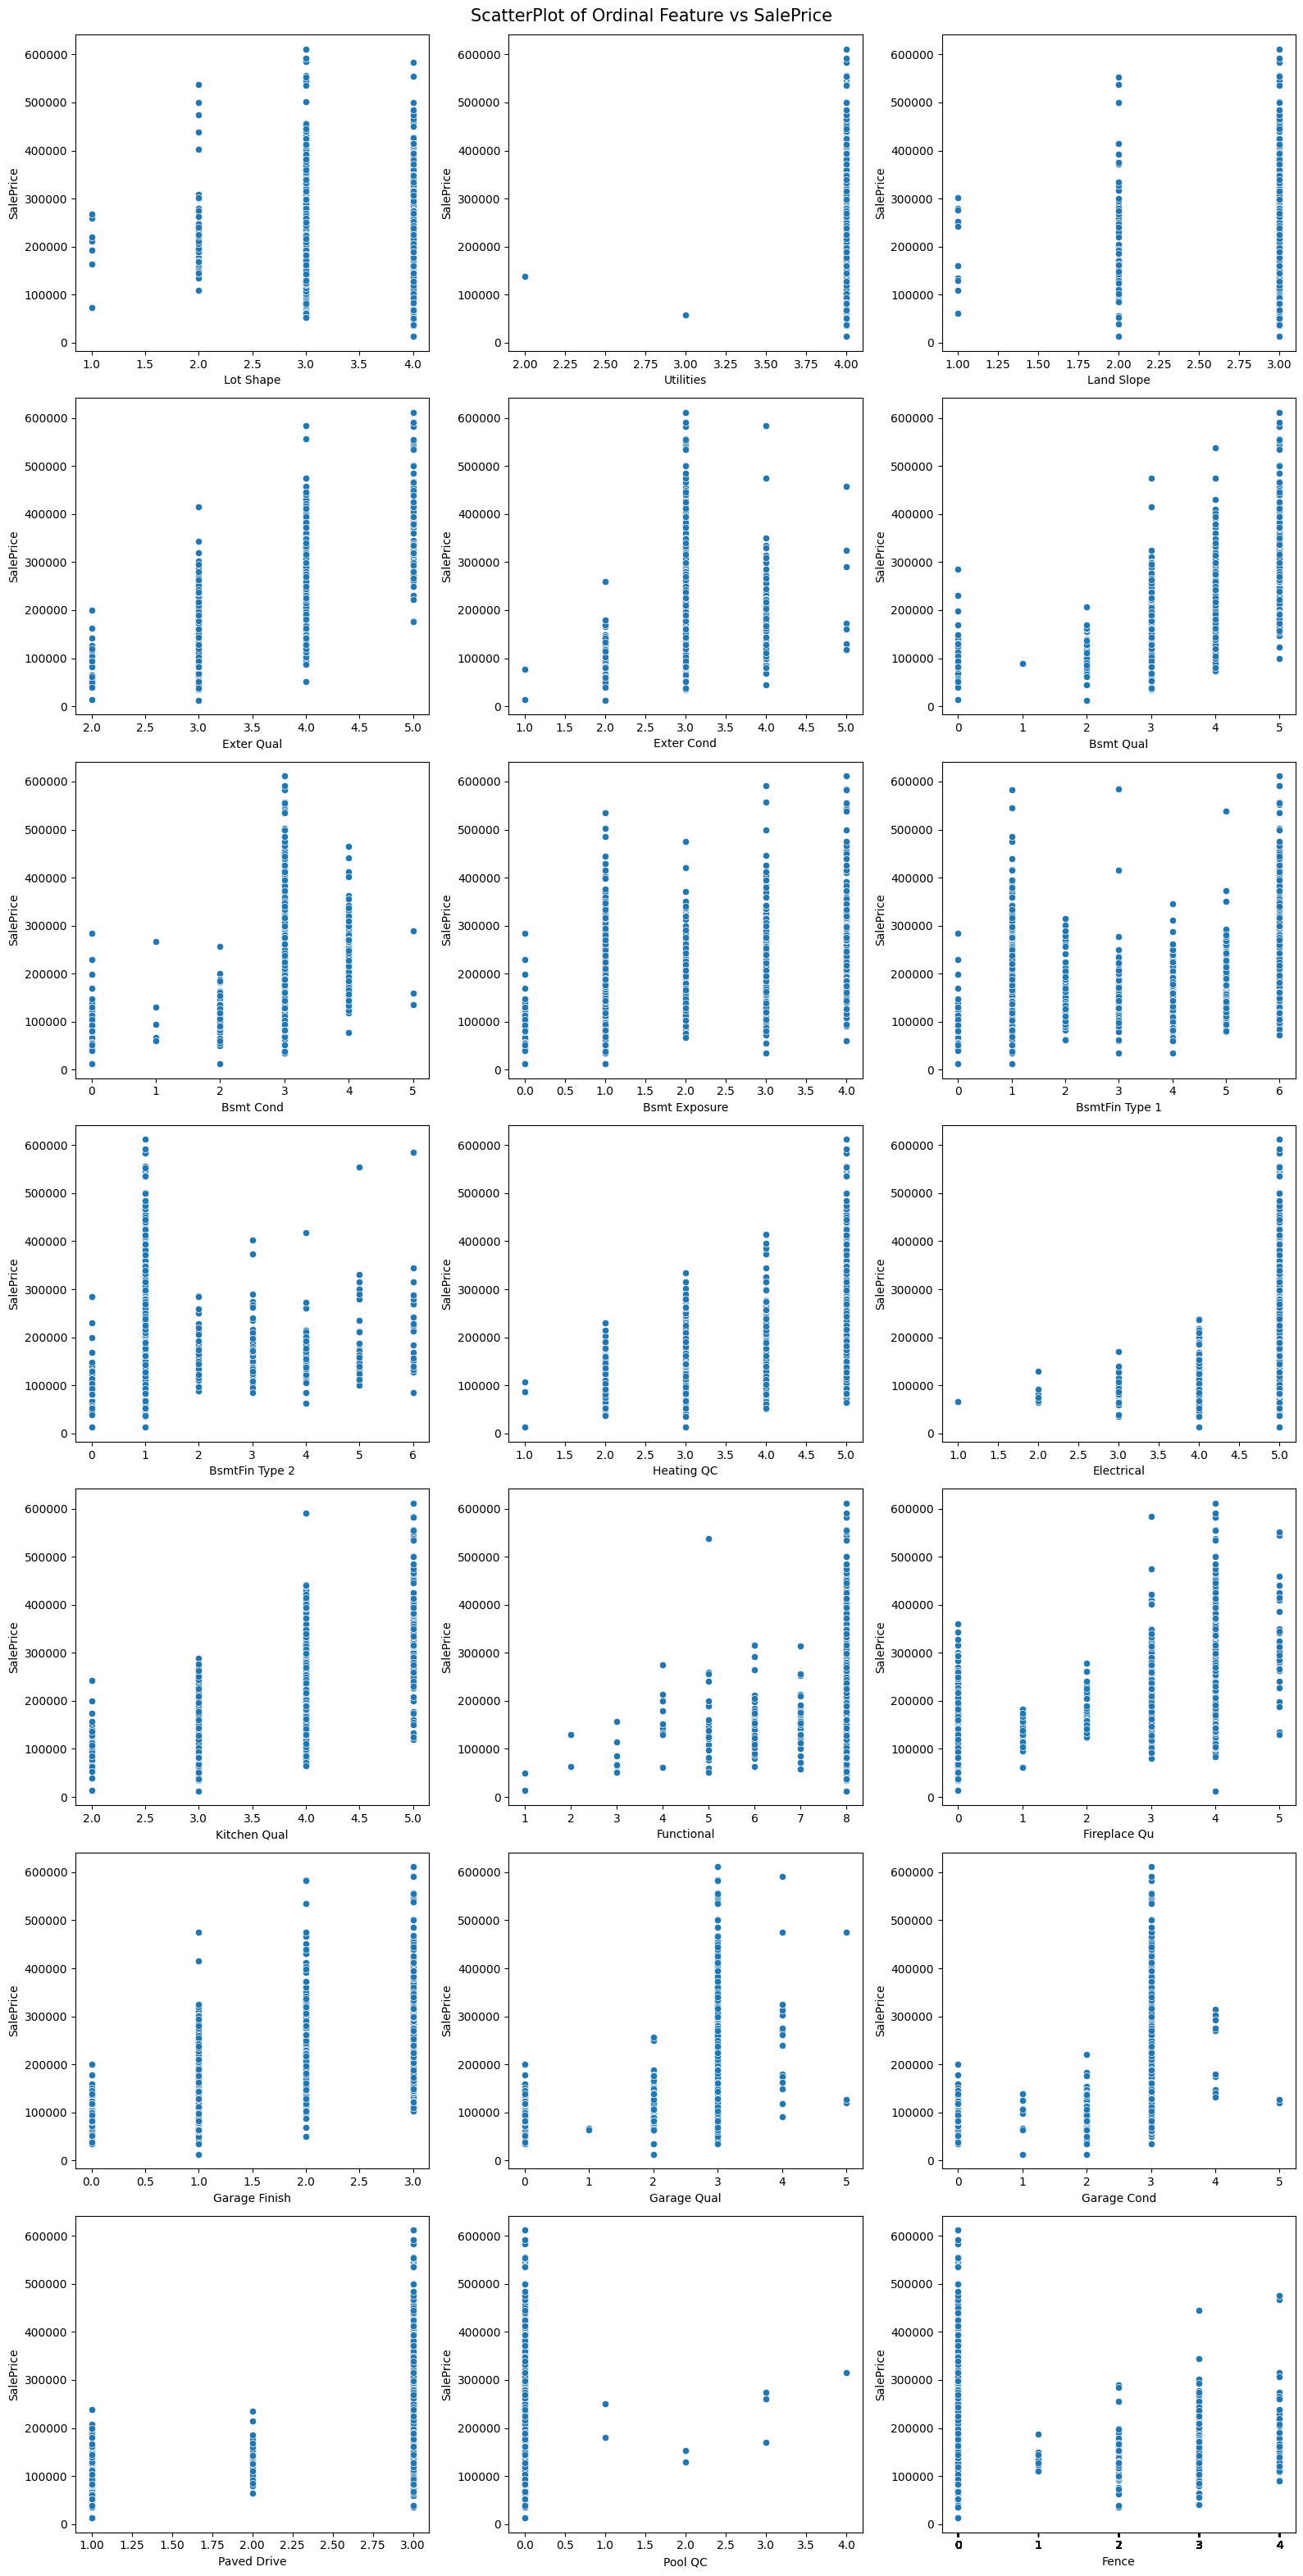

In [19]:
fig, ax = plt.subplots(nrows = 7, ncols = 3, figsize=(16,32))

x = 0
y = 0

for feature in ordinal_df:
    sns.scatterplot(x = df[feature], y = df['SalePrice'], ax = ax[x][y])
    plt.xticks(df[feature])
    
    if y != 2:
        y += 1
    else:
        y = 0
        x += 1
    
plt.suptitle('ScatterPlot of Ordinal Feature vs SalePrice', fontsize = 15)
plt.tight_layout()
fig.subplots_adjust(top=0.97);

**Observations:**
1. Most of the features does not have a good distribution of category
2. 'BsmtFin Type 1', 'Garage Finish' has good category distributions
3. Outliers spotted in 'Kitchen Qual' vs 'SalePrice' --> Kitchen Quality = 4 but the SalePrice is more than 500,000

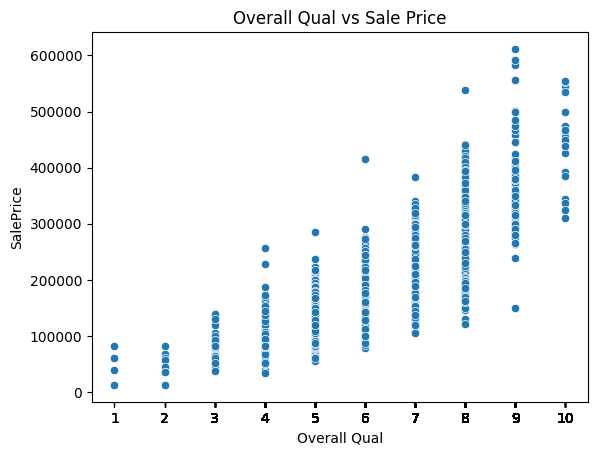

In [20]:
# Re-plot 'Overall Qual', 'Exter Qual', 'Kitchen Qual' for closer examination as they are the top 3 features affecting SalePrice
sns.scatterplot(x = df['Overall Qual'], y = df['SalePrice']).set(title='Overall Qual vs Sale Price');
plt.xticks(df['Overall Qual']);

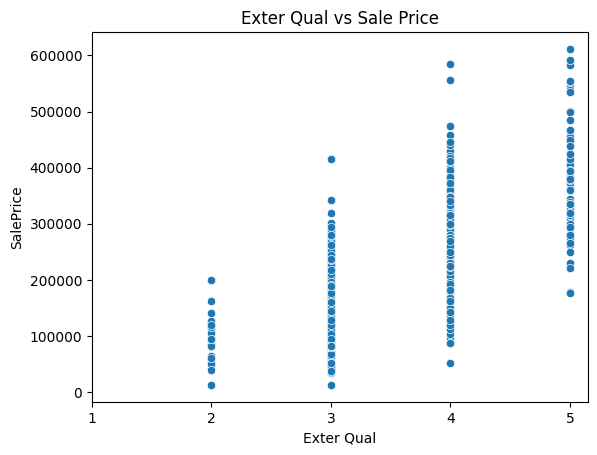

In [21]:
sns.scatterplot(x = df['Exter Qual'], y = df['SalePrice']).set(title='Exter Qual vs Sale Price');
plt.xticks([1, 2, 3, 4, 5]);

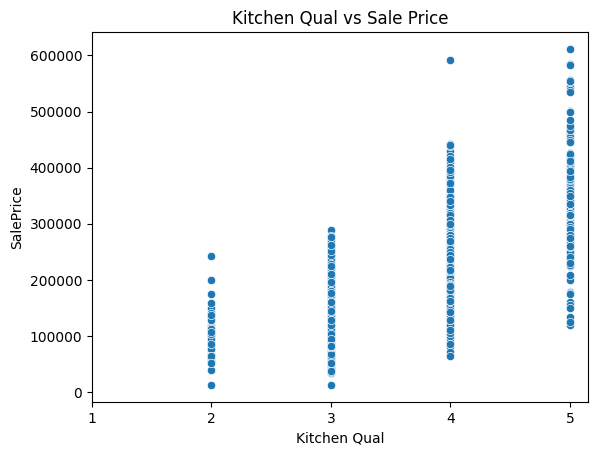

In [22]:
sns.scatterplot(x = df['Kitchen Qual'], y = df['SalePrice']).set(title='Kitchen Qual vs Sale Price');
plt.xticks([1, 2, 3, 4, 5]);

**Observations:**
1. There are no outliers spotted in 'Overall Qual' and 'Exter Qual' vs 'SalePrice'
2. There is an outlier in 'Kitchen Qual' vs 'SalePrice' as shown in the graph above

In [23]:
df[(df['Kitchen Qual'] == 4) & (df['SalePrice'] > 500000)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1962,20,RL,52.0,51974,Pave,N.A.,3,Lvl,4,CulDSac,3,StoneBr,PosN,Norm,1Fam,1Story,9,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,710.0,5,3,PConc,5,3,3,6,1101.0,1,0.0,1559.0,2660.0,GasA,5,Y,5,2338,0,0,2338,1.0,0.0,2,1,4,1,4,8,8,2,4,Attchd,2005.0,3,3.0,1110.0,4,3,3,0,135,0,0,322,0,0,0,N.A.,0,6,2007,New,591587


In [24]:
df = df.drop(index = 1962)

## D. Features Heatmap

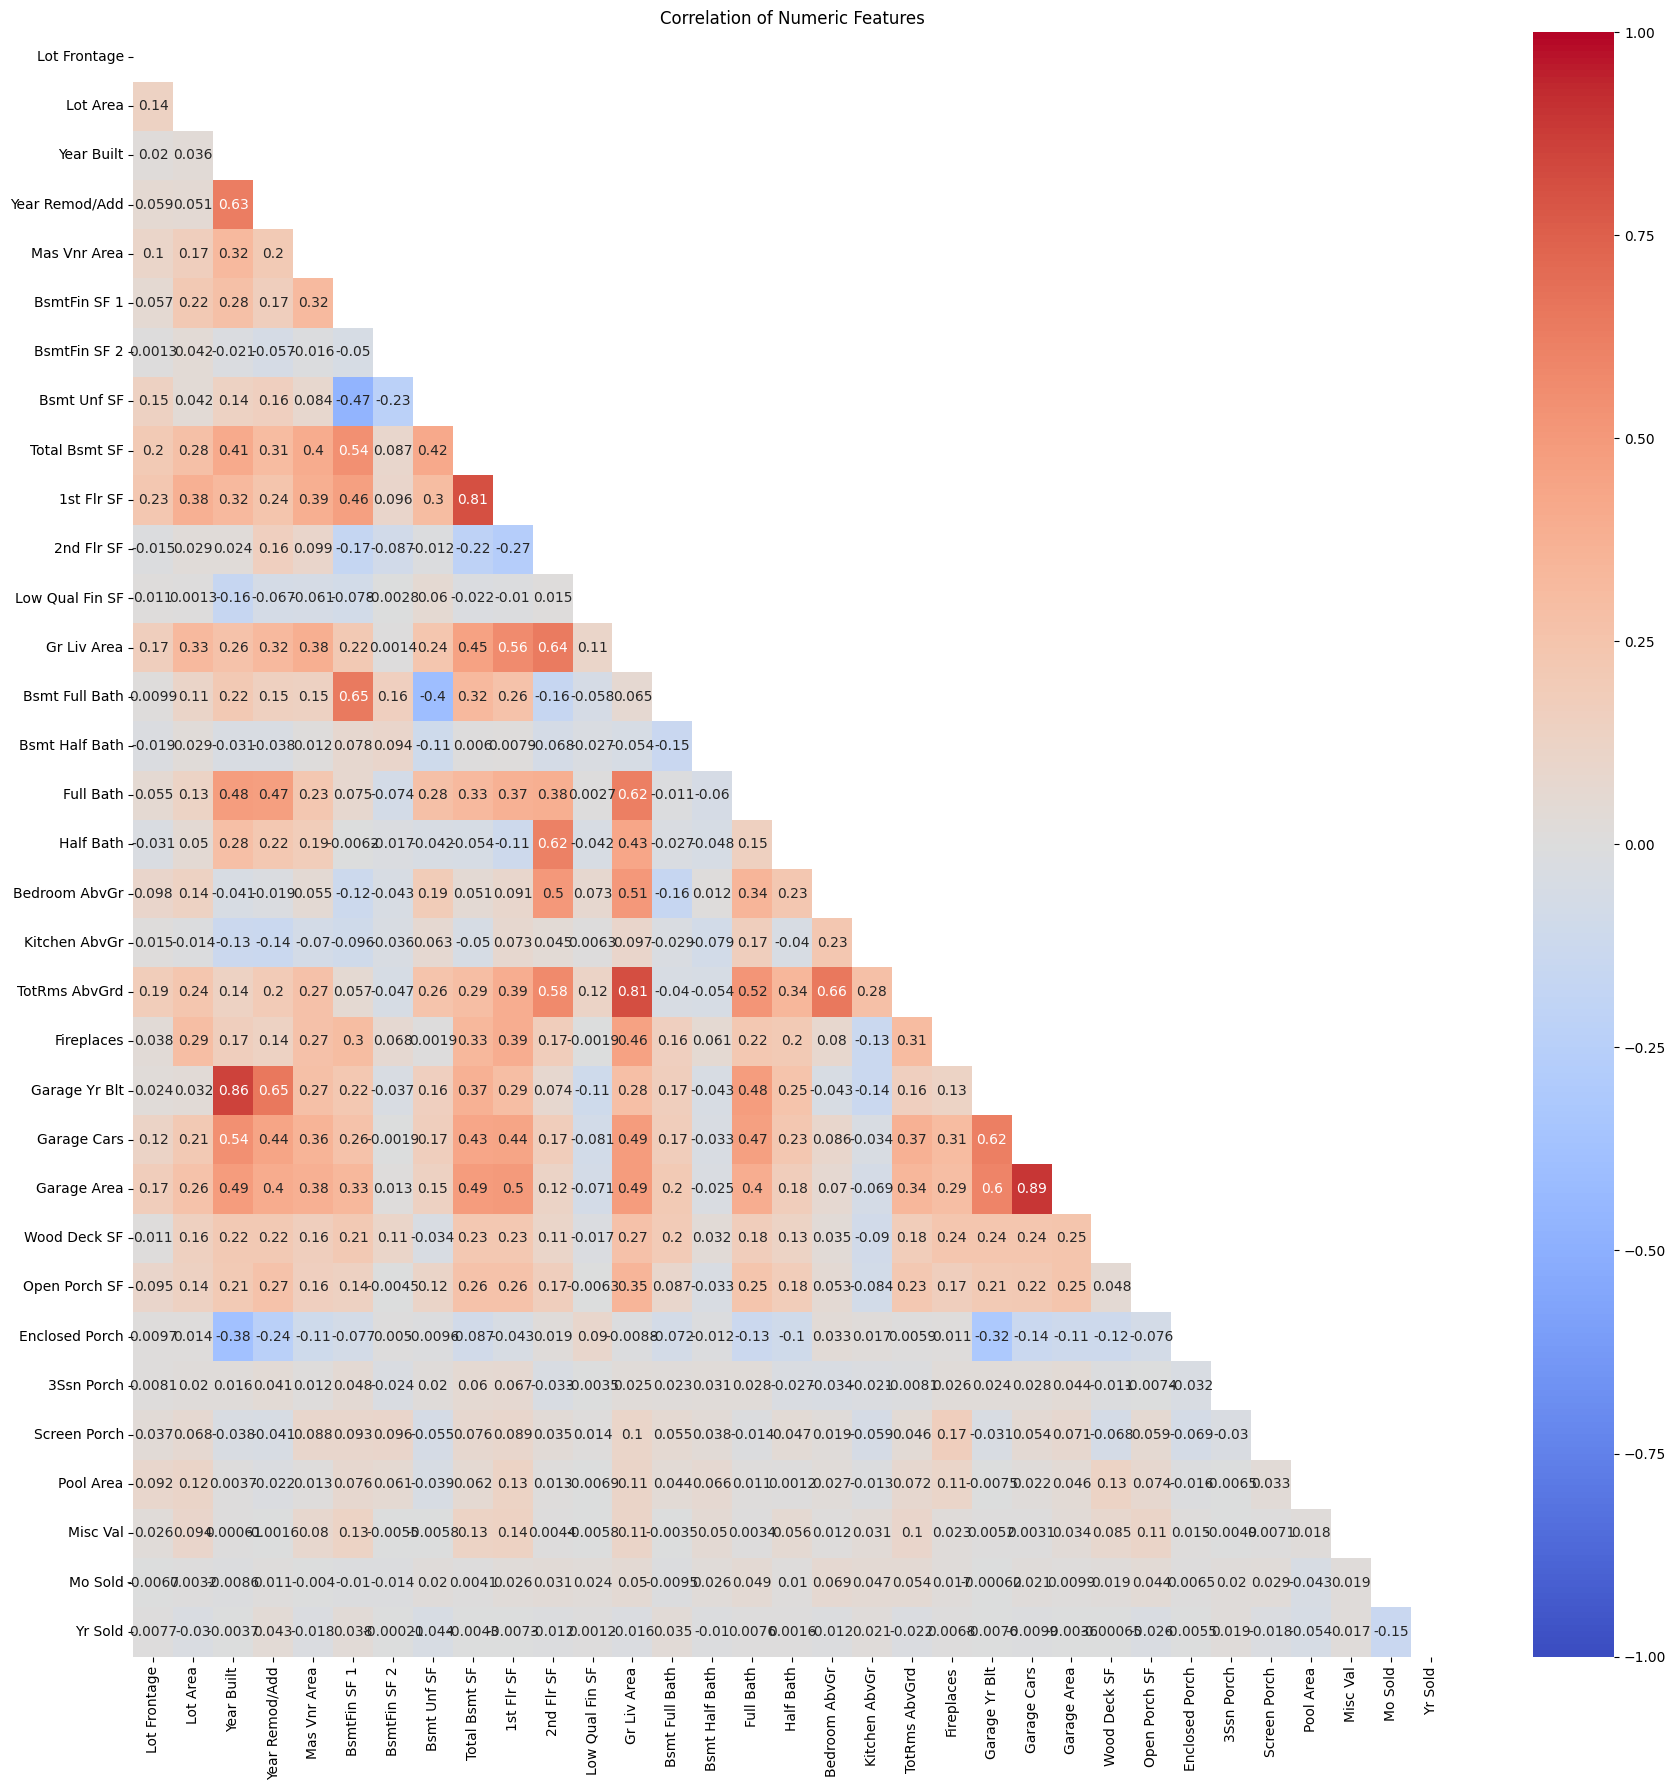

In [25]:
# Plot heatmap to visualise correlation

mask = np.zeros(numeric_df.corr().shape, dtype = bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(18,18))
plt.title('Correlation of Numeric Features')
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot = True, mask = mask, vmin = -1, vmax = 1)

plt.tight_layout();

**Observations:**
1. 'Garage Area' and 'Garage Cars' have high correlation of 0.89
2. 'Garage Yr Blt' and 'Year Built' have high correlation of 0.86
3. '1st Flr SF' and 'Total Bsmt SF' have high correlation of 0.81
4. 'TotRms AbvGrd' and 'Gr Liv Area' have high correlation of 0.81

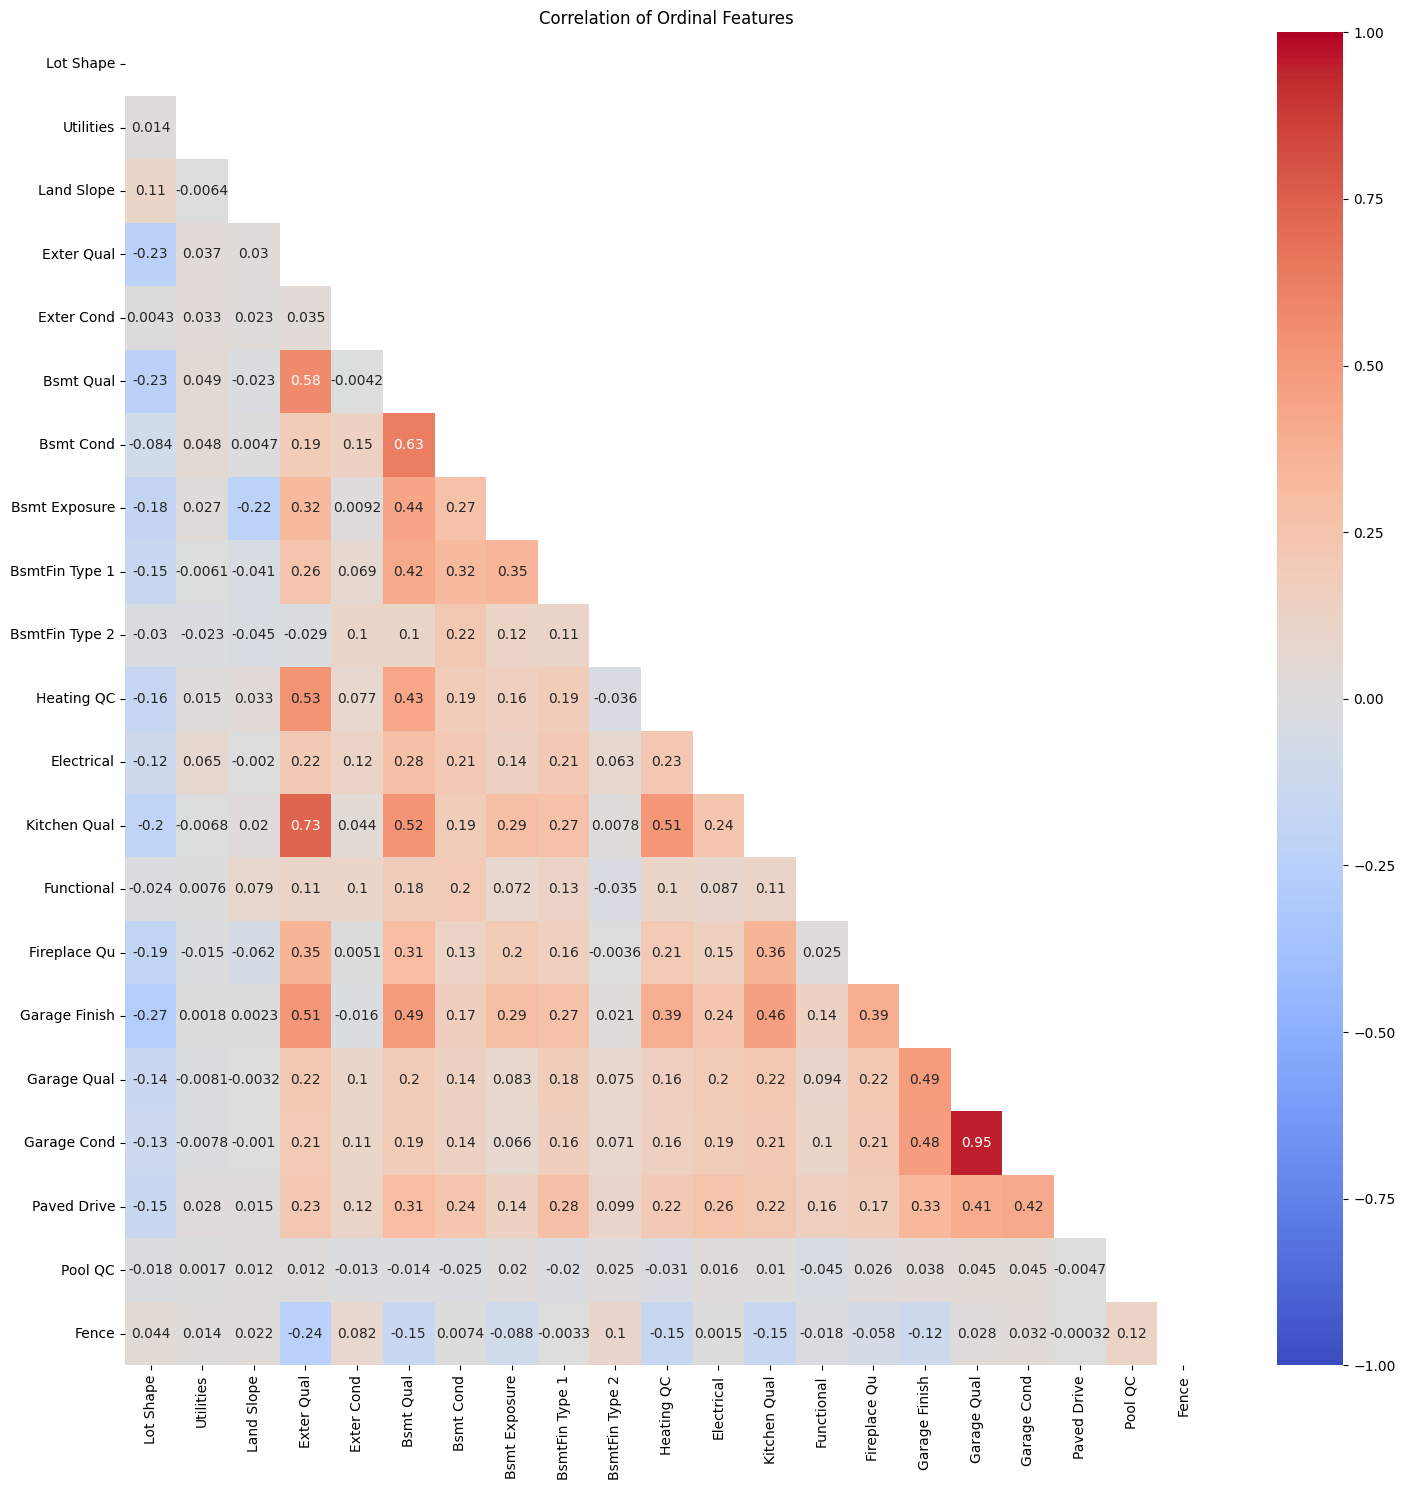

In [26]:
# Plot heatmap to visualise correlation

mask = np.zeros(ordinal_df.corr().shape, dtype = bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,15))
plt.title('Correlation of Ordinal Features')
sns.heatmap(ordinal_df.corr(), cmap='coolwarm', annot = True, mask = mask, vmin = -1, vmax = 1)

plt.tight_layout();

**Observations:**
1. 'Garage Cond' and 'Garage Qual' have high correlation of 0.95

## E. EDA Summary

- Majority of features have low variance.
- There are a few features that has high correlation with each other. We shall review if there's a need to remove them in the model tuning stage.
- There are 2 outliers spotted where the house footprints are huge, but the SalePrice are very low. These 2 datas have been removed from the analysis
- The top 5 features affecting SalePrice are: Overall Qual, Exter Qual, Gr Liv Area, Kitchen Qual, and Garage Area.

# 03. BASELINE MODEL

## A. Define X and y

In [27]:
nominal_df = df[['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1',
                 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
                 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type']].copy()

In [28]:
# Define X & y
# Dummify nominal variables as before and assign it to X

X = pd.get_dummies(df, columns = nominal_df.columns, drop_first=True)
X = X.drop(columns = "SalePrice")
y = df["SalePrice"]

In [29]:
# Preview X
X.head()

,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_N.A.,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_N.A.,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_N.A.,Misc Feature_N.A.,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,0.0,13517,3,4,3,6,8,1976,2005,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,725.0,5,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0,1976.0,2,2.0,475.0,3,3,3,0,44,0,0,0,0,0,0,0,3,2010,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,43.0,11492,3,4,3,7,5,1996,1997,132.0,4,3,4,3,1,6,637.0,1,0.0,276.0,913.0,5,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3,1

## B. Train Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## C. Transform

In [31]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## D. Instantiate & Fit Models

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
lasso = LassoCV(n_alphas=200)
lasso.fit(X_train, y_train.values)

LassoCV(n_alphas=200)

In [34]:
ridge = RidgeCV(alphas=np.logspace(.1, 5, 100))
ridge.fit(X_train, y_train.values)

RidgeCV(alphas=array([1.25892541e+00, 1.41089583e+00, 1.58121126e+00, 1.77208622e+00,
       1.98600253e+00, 2.22574162e+00, 2.49442067e+00, 2.79553315e+00,
       3.13299424e+00, 3.51119173e+00, 3.93504311e+00, 4.41005945e+00,
       4.94241710e+00, 5.53903799e+00, 6.20767959e+00, 6.95703587e+00,
       7.79685023e+00, 8.73804227e+00, 9.79284974e+00, 1.09749877e+01,
       1.22998266e+01, 1.37845927e+0...
       7.27136862e+03, 8.14912747e+03, 9.13284445e+03, 1.02353102e+04,
       1.14708595e+04, 1.28555573e+04, 1.44074081e+04, 1.61465896e+04,
       1.80957154e+04, 2.02801287e+04, 2.27282321e+04, 2.54718569e+04,
       2.85466766e+04, 3.19926714e+04, 3.58546473e+04, 4.01828193e+04,
       4.50334639e+04, 5.04696512e+04, 5.65620645e+04, 6.33899198e+04,
       7.10419954e+04, 7.96177868e+04, 8.92287996e+04, 1.00000000e+05]))

In [35]:
enet = ElasticNetCV (n_alphas = 100, l1_ratio = np.linspace(0.01,1,25))
enet.fit(X_train, y_train)

ElasticNetCV(l1_ratio=array([0.01   , 0.05125, 0.0925 , 0.13375, 0.175  , 0.21625, 0.2575 ,
       0.29875, 0.34   , 0.38125, 0.4225 , 0.46375, 0.505  , 0.54625,
       0.5875 , 0.62875, 0.67   , 0.71125, 0.7525 , 0.79375, 0.835  ,
       0.87625, 0.9175 , 0.95875, 1.     ]))

## E. Cross Validation

In [36]:
lr_CV_scores = cross_val_score(lr, X_train, y_train, cv=5)
round(lr_CV_scores.mean(),3)

-6.639595166779475e+22

In [37]:
lasso_CV_scores = cross_val_score(lasso, X_train, y_train, cv=5)
round(lasso_CV_scores.mean(),3)

0.908

In [38]:
ridge_CV_scores = cross_val_score(ridge, X_train, y_train, cv=5)
round(ridge_CV_scores.mean(),3)

0.906

In [39]:
enet_CV_scores = cross_val_score(enet, X_train, y_train, cv=5)
round(enet_CV_scores.mean(),3)

0.908

## F. Model Evaluation

### I. LINEAR REGRESSION

In [40]:
y_preds_lr = lr.predict(X_test)

In [41]:
print(f"Linear Regression Train Score: {round(lr.score(X_train, y_train),3)}")
print(f"Linear Regression Test Score: {round(lr.score(X_test, y_test),3)}")
print(f"Linear Regression RMSE: {round(metrics.mean_squared_error(y_test, y_preds_lr, squared=False),3)}")

Linear Regression Train Score: 0.936
Linear Regression Test Score: -9.810926492919653e+23
Linear Regression RMSE: 7.68062091259318e+16


### II. LASSO

In [42]:
y_preds_lasso = lasso.predict(X_test)

In [43]:
print(f"Lasso Train Score: {round(lasso.score(X_train, y_train),3)}")
print(f"Lasso Test Score: {round(lasso.score(X_test, y_test),3)}")
print(f"Lasso RMSE: {round(metrics.mean_squared_error(y_test, y_preds_lasso, squared=False),3)}")

Lasso Train Score: 0.929
Lasso Test Score: 0.903
Lasso RMSE: 24167.582


In [44]:
round(lasso.alpha_,3)

476.097

In [45]:
dict(zip(X.columns, lasso.coef_))

{'Lot Frontage': 1359.3055316977845,
 'Lot Area': 4171.8657733789305,
 'Lot Shape': 0.0,
 'Utilities': -0.0,
 'Land Slope': -38.100982664190994,
 'Overall Qual': 11052.578653746239,
 'Overall Cond': 4208.137141724909,
 'Year Built': 7111.694124681365,
 'Year Remod/Add': 1030.7794720792785,
 'Mas Vnr Area': 5199.391111158413,
 'Exter Qual': 5101.027882689472,
 'Exter Cond': -0.0,
 'Bsmt Qual': 834.3186778809094,
 'Bsmt Cond': -2307.8120742831356,
 'Bsmt Exposure': 3510.546439335319,
 'BsmtFin Type 1': 0.0,
 'BsmtFin SF 1': 8251.764383614423,
 'BsmtFin Type 2': 0.0,
 'BsmtFin SF 2': 777.5790579200872,
 'Bsmt Unf SF': -0.0,
 'Total Bsmt SF': 6968.8240379018325,
 'Heating QC': 970.8307755248932,
 'Electrical': -0.0,
 '1st Flr SF': 803.2612896193813,
 '2nd Flr SF': 0.0,
 'Low Qual Fin SF': -463.405847931283,
 'Gr Liv Area': 25667.566743087533,
 'Bsmt Full Bath': 1490.7877313386246,
 'Bsmt Half Bath': 0.0,
 'Full Bath': 0.0,
 'Half Bath': 565.1323735873787,
 'Bedroom AbvGr': -1886.1582861338

### III. RIDGE

In [46]:
y_preds_ridge = ridge.predict(X_test)

In [47]:
print(f"Ridge Train Score: {round(ridge.score(X_train, y_train),3)}")
print(f"Ridge Test Score: {round(ridge.score(X_test, y_test),3)}")
print(f"Ridge RMSE: {round(metrics.mean_squared_error(y_test, y_preds_ridge, squared=False),3)}")

Ridge Train Score: 0.931
Ridge Test Score: 0.898
Ridge RMSE: 24718.333


In [48]:
ridge.alpha_

212.45782310305697

### IV. ELASTICNET

In [49]:
y_preds_enet = enet.predict(X_test)

In [50]:
print(f"ElasticNet Train Score: {round(enet.score(X_train, y_train),3)}")
print(f"ElasticNet Test Score: {round(enet.score(X_test, y_test),3)}")
print(f"ElasticNet RMSE: {round(metrics.mean_squared_error(y_test, y_preds_enet, squared=False),3)}")

ElasticNet Train Score: 0.929
ElasticNet Test Score: 0.903
ElasticNet RMSE: 24163.439


In [51]:
enet.alpha_

480.96324659469633

In [52]:
enet.l1_ratio_

1.0

# 04. SUMMARY & FINDINGS

**Summary of Baseline Model Score:** <br>
|No |Test Type | Train Score | Test Score | CrossVal R2 Score | RMSE Score | Remarks |
| --- | --- | --- | --- | --- | --- | --- |
|1. |Linear Regression | 0.936 | -9.8e+23 | -6.6e+22 | 7.7e+16 | Poor Performance |
|2. |Lasso | 0.929 | 0.903 | 0.908 | 24167 | To use for model tuning |
|3. |Ridge | 0.931 | 0.898 | 0.906 | 24718 | To use for model tuning |
|4. |ElasticNet | 0.929 | 0.903 | 0.908 | 24163 | Similar to Lasso (l1 ratio = 1) |

**Linear Regression** <br>
- This model has poor performance in predicting the housing price. We shall not use this in our model tuning.

**Lasso:** <br>
- This model has the highest Train score at 92.9% and CrossVal R2 score at 90.8%
- Lasso are also able to zero out some coefficients such as Lot Shape, Utilities, etc.
- The Train score is 92.9% whereas the Test Score is 90.3% (2.6%), suggesting that our model is slightly overfitting.

**Ridge:**<br>
- This model also performs quite well with training, testing & CrossVal R2 score around 90%
- The RMSE score is around 24718, only slightly lower than Lasso Regression.

**ElasticNet:** <br>
- This model is exactly the same as Lasso Model, as the l1 ratio is 1.
- As ElasticNet take longer to run, we shall remove this in the Model Tuning stage.

**Conclusion:** Even though the results are quite good (~90% accuracy), we shall exercise some Feature Engineering to see if we can further improve our Model

# 05. EXPORT DATA

In [53]:
df.to_csv('../datasets/train_cleaned_2.csv', index=False)